# Individual Lab --- Week 2

Your individual lab should be turned in by email and should be completely self-contained.  This means that this  should be written in a proper order such that when all programming cells are run sequentially, the desired results occur.  (Test this out before you submit:  Use the Kernel Menu, then choose "Restart and Run All".)

As necessary, I have included your work from last week.  You must complete the questions below, which are the questions remaining from Week 1.  At the end of the 90 minute period, please send me an email with your completed work.

At any time during this session, I am willing to give you confirmation if you have completed a given goal.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Question 4
**import a function, plot, and use a slider** (see, e.g., Lab 6)

Make sure you download and include the file, ``individual2.py`` in the same folder as this lab.  The file has a function, ``free_fall(t, v0)`` whose inputs are a time, t, in seconds, and an initial velocity in the y-direction in m/s and returns the displacement of the object in free fall.  We want to create a slider to explore different initial velocities.  We want to:

- ``import`` the functions from this file
- Create a function that takes the initial velocity as an input (in m/s), then creates a plot (displacement versus time) between t = 0 and 4 seconds with enough points to clearly see the trajectory, and make it smooth.  
- Create a slider to plot the free fall trajectories for different initial velocities, from 5 to 20 m/s.

In [2]:
import individual2 as indiv2

In [3]:
def freefall_plot(vy):
    time = np.linspace(0, 4, 500)
    displacement = np.zeros(len(time))
    
    for i in range(len(time)):
        displacement[i] = indiv2.free_fall(time[i], vy)
        
    plt.figure()
    plt.plot(time, displacement)
    plt.xlabel("time (s)")
    plt.ylabel("displacement (m)")
    plt.show()

In [4]:
widgets.interact(freefall_plot, vy=(5,20))

interactive(children=(IntSlider(value=12, description='vy', max=20, min=5), Output()), _dom_classes=('widget-i…

<function __main__.freefall_plot(vy)>

# Question 6
## Question 6 is here from last week because you can use it to help you do Question 7.  
**Solve an ODE** (You are strongly encouraged to use your ``time_step()`` function from Lab 10)

The equation of motion for the pendulum is
$$ \frac{d}{dt} \left( \begin{array}{c} \theta \\ \omega \end{array} \right) = \left( \begin{array}{c} \omega \\ - A \sin \theta \end{array} \right) $$
Here let's use $A = 4 \pi^2$ ``= 4 * np.pi**2`` and take the initial conditions $\theta_0 = 0.1$ and $\omega_0 = 0$.  You want to:

- Create a function that takes an array as input, e.g., ``x_in``, and whose output is an array with 2 elements that takes care of the two elements in the derivative, $\omega$ and $- A \sin \theta$.  We can associate our arrays with $\theta$ and $\omega$, e.g., ``theta, omega = x_in`` (just like we did in Lab 10).
- Solve the differential equation using 5000 points between 0 and 5.
- After setting the initial conditions (``theta = 0.1``; ``omega = 0``), you might look to create an array of these values, ``x_array[:] = [theta, omega]``.
- Use the ``time_step()`` function from Lab 10 to solve the differential equation.
- Plot the solution for $\theta$ vs. time.  Label the axes appropriately (the units for $\theta$ are radians and the units for time is seconds).  This should look like a cosine function that undergoes five periods of oscillation.

In [5]:
def pendulum(x_in):
    theta, omega = x_in
    
    derivative = np.zeros(2)
    derivative[:] = [omega, -A*np.sin(theta)]
    return derivative

def time_step(x_in, dt, pendulum):
    k1 = pendulum(x_in) * dt
    k2 = pendulum(x_in + k1) * dt
    
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final

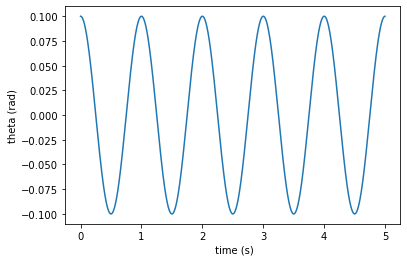

In [6]:
time = np.linspace(0,5,5000)
dt = time[1] - time[0]
x_step = np.zeros(len(time))
y_step = np.zeros(len(time))

theta = 0.1
omega = 0
A = 4 * np.pi**2

x_array = np.zeros(2)
x_array[:] = [theta, omega]

x_step[0] = x_array[0]
y_step[0] = x_array[1]

for i in range(1, len(time)):
    x_array = time_step(x_array, dt, pendulum)
    x_step[i] = x_array[0]
    y_step[i] = x_array[1]
    
plt.figure()
plt.plot(time, x_step)
plt.xlabel(" time (s)")
plt.ylabel("theta (rad)")
plt.show()

# Question 7
**Sliders and ODE solving** (see, e.g., Lab 10)

We are going to do the same thing as Question 6, but now we wish to have different initial conditions.  Create **a slider** that allows you to change the initial conditions from $\omega_0 = 0$, to a range of $\omega_0 = -5$ to 5, and then graphs the solution (keeping the initial $\theta_0 = 0.1$).  You should notice that as you increase the absolute value of $\omega_0$, not only does the amplitude increase, but the period increases as well.

In [9]:
def pendulum(x_in, omega):
    theta, omega = x_in
    
    derivative = np.zeros(2)
    derivative[:] = [omega, -A*np.sin(theta)]
    return derivative

def time_step(x_in, dt, pendulum, omega):
    k1 = pendulum(x_in, omega) * dt
    k2 = pendulum(x_in + k1, omega) * dt
    
    x_final = x_in + 0.5 * (k1 + k2)
    return x_final

def pendulum_plot(omega):
    time = np.linspace(0,5,5000)
    dt = time[1] - time[0]
    x_step = np.zeros(len(time))
    y_step = np.zeros(len(time))

    theta = 0.1
    A = 4 * np.pi**2

    x_array = np.zeros(2)
    x_array[:] = [theta, omega]

    x_step[0] = x_array[0]
    y_step[0] = x_array[1]

    for i in range(1, len(time)):
        x_array = time_step(x_array, dt, pendulum, omega)
        x_step[i] = x_array[0]
        y_step[i] = x_array[1]
    
    plt.figure()
    plt.plot(time, x_step)
    plt.xlabel(" time (s)")
    plt.ylabel("theta (rad)")
    plt.show()

In [10]:
widgets.interact(pendulum_plot, omega=(-5,5))

interactive(children=(IntSlider(value=0, description='omega', max=5, min=-5), Output()), _dom_classes=('widget…

<function __main__.pendulum_plot(omega)>